In [92]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import missingno as msno
import pandas as pd

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from wordcloud import WordCloud, STOPWORDS

In [93]:
df = pd.read_csv("Train.csv")

df_test = pd.read_csv("Test.csv")

df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


## Analyse du dataset

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Verification des duplicata

In [95]:
print(df.duplicated().sum())
print(df_test.duplicated().sum())

0
0


## Verification des valeurs manquantes

(8068, 11)
********************
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64
********************
Pourcentage des valeurs manquantes :
 ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64
********************


Text(0.5, 1.0, 'Distribution des valeurs manquantes')

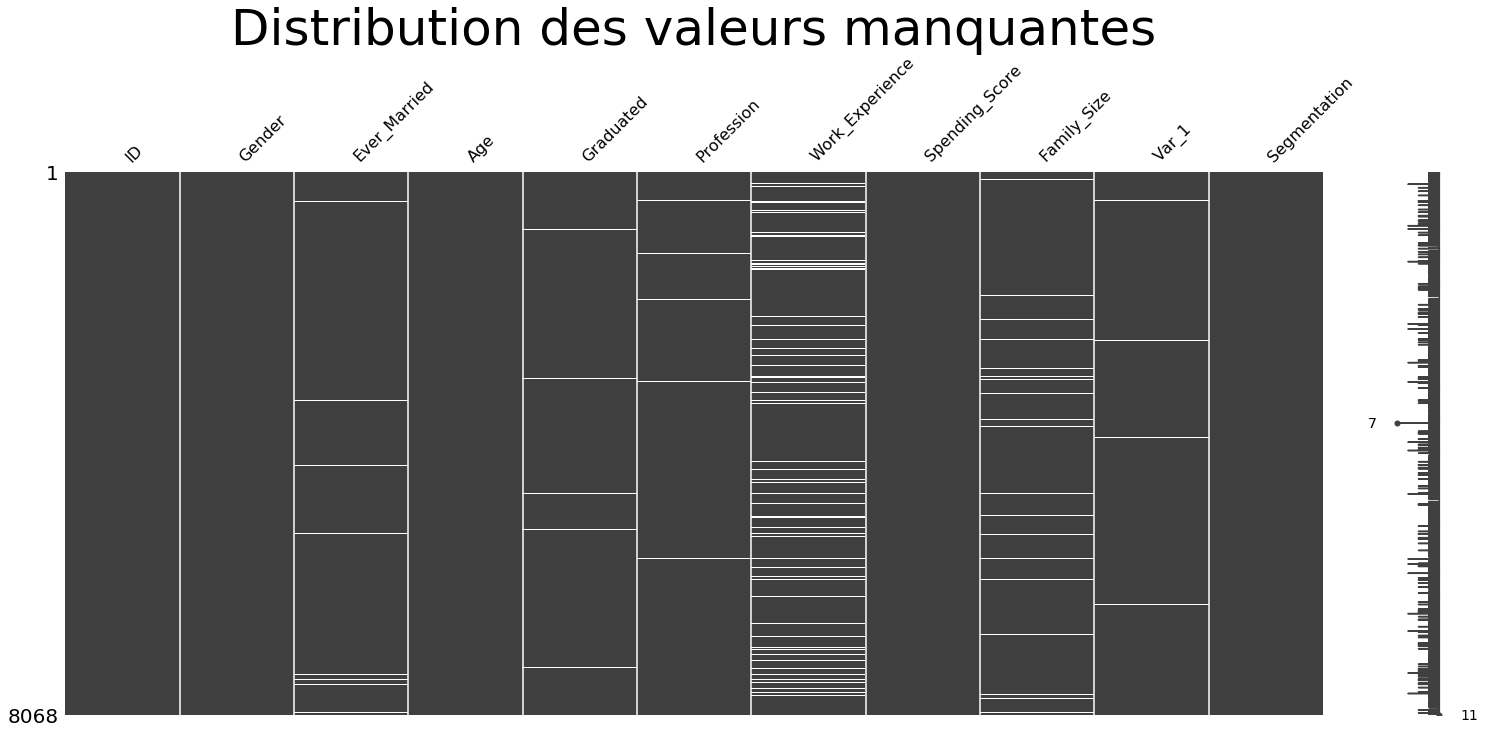

In [96]:
print(df.shape)
print('*'*20)

print(df.isnull().sum())
print('*'*20)

print('Pourcentage des valeurs manquantes :\n',df.isnull().mean()*100 )

print('*'*20)
msno.matrix(df)
plt.title('Distribution des valeurs manquantes',fontsize = 50)

In [97]:
# Description des données de type objet, on en aura besoin pour remplacer les nan par la valeur la plus mentionnée i.e. le mode
df.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


## Value count

In [98]:
# les valeurs distincts de chaque colonne
colTypeObj = df.select_dtypes('object')

for i in colTypeObj:
    print(df[i].value_counts(), end="\n\n")

Male      4417
Female    3651
Name: Gender, dtype: int64

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

Yes    4968
No     3022
Name: Graduated, dtype: int64

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64



### Verification des Outliers

(0, 30)

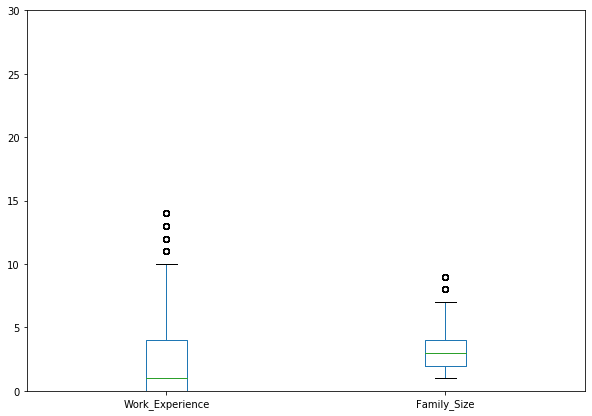

In [99]:
nouveau_df = df[['Work_Experience', 'Family_Size']]
nouveau_df

nouveau_df.plot(kind='box', figsize=(10,7))
plt.ylim(0,30)

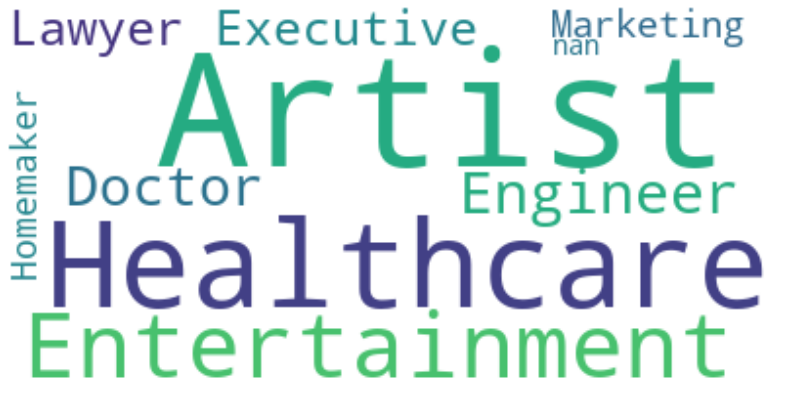

In [100]:
# display(df.head())
list_profession = np.array(df[df['Profession']!='nan']['Profession'])

text = ' '.join(list_profession.astype(str))

# instantiate a word cloud object


stopwords = set(STOPWORDS)
alice_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

# generathttp://localhost:8888/notebooks/Downloads/Customer-Segmentation-main/Customer-Segmentation-main/Untitled.ipynb?kernel_name=python3#e the word cloud
alice_wc.generate(text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Nettoyage de données


- On remplace les valeurs manquantes de 'Ever_Married' et 'Graduated' par 'NO'.
- On remplace les valeurs manquantes de 'Profession' et 'Var_1' par la valeur la plus mentionnéé.
- On remplace les valeurs manquantes de 'Work_Experience' et 'Family_Size' par la valeur la mediane et on enleve les valeurs abberantes.


In [101]:
# On appliquera la fonction Nettoyer_Donnees sur le trainset et le test set pour les nettoyer

def supp_valAbberantes(df, col):
        qmin, qmax = df[col].quantile(.25), df[col].quantile(.75)
        interq = 1.5 * (qmax - qmin)
        qmin -= interq
        qmax += interq
        return df[col].apply(lambda x: qmin if x < qmin else qmax if x > qmax else x)
    
    
def Nettoyer_Donnees(df):
       
    df['Ever_Married'] = df['Ever_Married'].fillna('No')
    df['Graduated'] = df['Graduated'].fillna('No')
    
    for col in ['Profession', 'Var_1']:
        df[col] = df[col].fillna(df[col].mode().values[0])
        
    for col in ['Work_Experience', 'Family_Size']:
        df[col] = df[col].fillna(df[col].median())
        df[col] = supp_valAbberantes(df, col)
        
#     df.drop(columns=['ID'], inplace=True)
    
    segment_map = {'A':1, 'B':2, 'C':3, 'D':4}
    df['Segmentation'] = df['Segmentation'].map(segment_map)
    for col in df.select_dtypes(exclude='number'):
        df[col] = df[col].apply(lambda x: str(x).strip())
    return df

In [102]:
Donnees_nettoye = Nettoyer_Donnees(df)
display(Donnees_nettoye.head())

print('*'*20,'\n')
print(df.shape)

print('*'*20,'\n')
print(Donnees_nettoye.isnull().sum())

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,1


******************** 

(8068, 11)
******************** 

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [103]:
# def Transformer_Donnees(df):
#     y = df['Segmentation']
#     df.drop(columns=['Segmentation'], inplace=True)
#     genders = {'Male':0,'Female':1}
#     df['Gender'] = df['Gender'].map(genders)

#     married = {'No':0,'Yes':1}
#     df['Ever_Married'] = df['Ever_Married'].map(married)

#     graduate = {'No':0,'Yes':1}
#     df['Graduated'] = df['Graduated'].map(graduate)
#     for col in df.select_dtypes(exclude='number').columns.values:
        
#         df = pd.concat([pd.get_dummies(df[col], prefix=col), df], axis=1)
#         df.drop(columns=col, inplace=True)
#     return df, y

In [104]:
# X_train, y_train = Transformer_Donnees(Donnees_nettoye)

In [105]:
# X_train.head()

In [106]:
## Visualisation

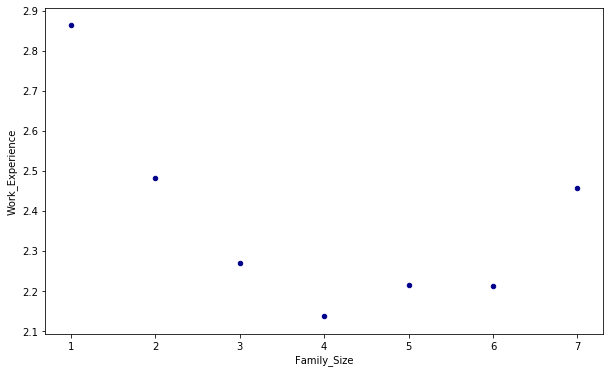

In [107]:
FS = Donnees_nettoye.groupby("Family_Size",axis = 0).mean()[["Work_Experience"]]


new_df = pd.DataFrame({'Family_Size' : np.array(FS.index) , 'Work_Experience' : np.array(FS["Work_Experience"])})

new_df
new_df.plot(kind='scatter', x='Family_Size', y='Work_Experience', figsize=(10, 6), color='darkblue')

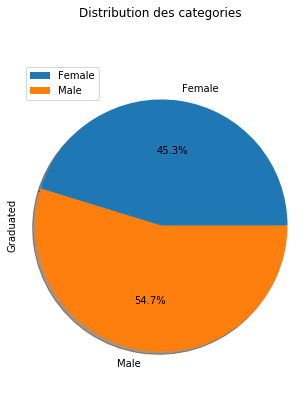

In [108]:
A = Donnees_nettoye.groupby("Gender",axis = 0).count()[["Graduated"]]

A["Graduated"].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=0,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )



plt.title('Distribution des categories', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=A.index, loc='upper left') 

plt.show()

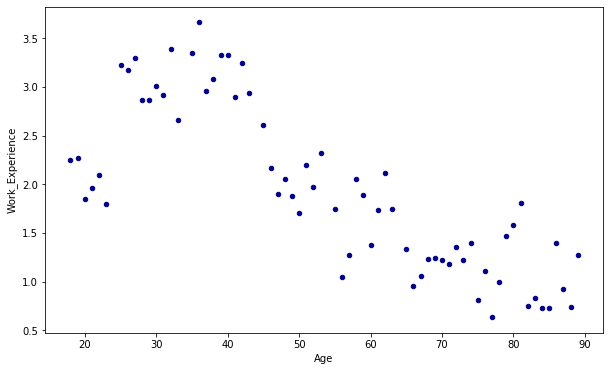

In [109]:
FS1 = Donnees_nettoye.groupby("Age",axis = 0).mean()[["Work_Experience"]]

new_df = pd.DataFrame({'Age' : np.array(FS1.index) , 'Work_Experience' : np.array(FS1["Work_Experience"])})

new_df
new_df.plot(kind='scatter', x='Age', y='Work_Experience', figsize=(10, 6), color='darkblue')

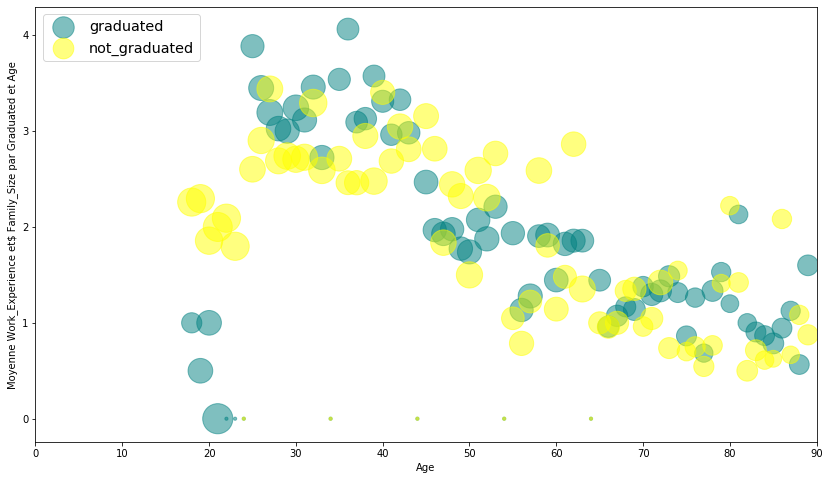

In [114]:
df_graduated = Donnees_nettoye[Donnees_nettoye["Graduated"]=='Yes'].groupby("Age",axis = 0).mean()[["Work_Experience","Family_Size"]]

df_not_graduated = Donnees_nettoye[Donnees_nettoye["Graduated"]=='No'].groupby("Age",axis = 0).mean()[["Work_Experience","Family_Size"]]


for i in range(18,90):
    if i not in df_graduated.index:
        df_graduated.loc[i] = [0,0]
        
        
for i in range(18,90):
    if i not in df_not_graduated.index:
        df_not_graduated.loc[i] = [0,0]
        
        
        
df_graduated = df_graduated.sort_index()
df_not_graduated = df_not_graduated.sort_index()   


new_df_taille_fam = pd.DataFrame({'Age' : df_graduated.index , 'Work_Experience_yes' : np.array(df_graduated["Work_Experience"]),
                                  'fam_yes' : np.array(df_graduated["Family_Size"]), 'Work_Experience_no' : np.array(df_not_graduated["Work_Experience"]),
                                 'fam_no' : np.array(df_not_graduated["Family_Size"])
                                 })



# Brazil
ax0 = new_df_taille_fam.plot(kind='scatter',
                    x='Age',
                    y='Work_Experience_yes',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='teal',
                    s=new_df_taille_fam['fam_yes']* 200 + 10,  # pass in weights 
                    xlim=(0, 90)
                   )

# Argentina
ax1 = new_df_taille_fam.plot(kind='scatter',
                    x='Age',
                    y='Work_Experience_no',
                    alpha=0.5,
                    color="yellow",
                    s=new_df_taille_fam['fam_no']* 200 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Moyenne Work_Experience et Family_Size par Graduated et Age')
ax0.set_title('')
ax0.legend(['graduated', 'not_graduated'], loc='upper left', fontsize='x-large')

In [112]:
B = Donnees_nettoye.groupby("Var_1",axis = 0).count()

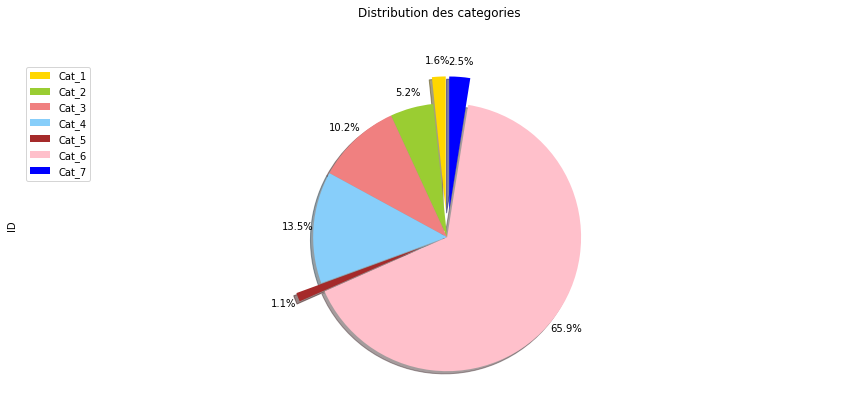

In [113]:
K = B.sort_values(by = "ID", ascending=True)
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'brown', 'pink','blue']
explode_list = [0.2, 0, 0, 0, 0.2, 0, 0.2] # ratio for each continent with which to offset each wedge.

B["ID"].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )





# scale the title up by 12% to match pctdistance
plt.title('Distribution des categories', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=B.index, loc='upper left') 

plt.show()